In [1]:
import fastf1 as ff1
from fastf1 import plotting
plotting.setup_mpl()
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
pio.templates.default = "plotly_dark"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
year = 2022
gp_round = 7
ses = 'FP3'
driver_1 = 'LEC'
driver_2 = 'GAS'

In [3]:
events_list = ff1.get_event_schedule(2022)[2:]

session = ff1.get_session(year, gp_round, ses)
session.load(weather=True, telemetry=True)

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Monaco Grand Prix - Practice 3 [v2.2.8]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20',

In [4]:
events_list.head()

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
2,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,2022-03-20 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2022-03-18 15:00:00,Practice 2,2022-03-18 18:00:00,Practice 3,2022-03-19 15:00:00,Qualifying,2022-03-19 18:00:00,Race,2022-03-20 18:00:00,True
3,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,2022-03-27 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2022-03-25 17:00:00,Practice 2,2022-03-25 20:00:00,Practice 3,2022-03-26 17:00:00,Qualifying,2022-03-26 20:00:00,Race,2022-03-27 20:00:00,True
4,3,Australia,Melbourne,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,2022-04-10 17:00:00,Australian Grand Prix,conventional,Practice 1,2022-04-08 13:00:00,Practice 2,2022-04-08 16:00:00,Practice 3,2022-04-09 13:00:00,Qualifying,2022-04-09 16:00:00,Race,2022-04-10 15:00:00,True
5,4,Italy,Imola,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY ...,2022-04-24 17:00:00,Emilia Romagna Grand Prix,sprint,Practice 1,2022-04-22 13:30:00,Qualifying,2022-04-22 17:00:00,Practice 2,2022-04-23 12:30:00,Sprint,2022-04-23 16:30:00,Race,2022-04-24 15:00:00,True
6,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,2022-05-08 17:30:00,Miami Grand Prix,conventional,Practice 1,2022-05-06 14:30:00,Practice 2,2022-05-06 17:30:00,Practice 3,2022-05-07 13:00:00,Qualifying,2022-05-07 16:00:00,Race,2022-05-08 15:30:00,True


In [5]:





session = ff1.get_session(2022, 4, 'R')
session.load(weather=False, telemetry=False)
session.results.head()

core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v2.2.8]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '4', '63', '77', '16', '22', '5', '20', '18', '23', '10', '44', '31', '24', '6', '47', '3', '14', '55']


,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,1.0,NaT,NaT,NaT,0 days 01:32:07.986000,Finished,26.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,2.0,3.0,NaT,NaT,NaT,0 days 01:32:24.513000,Finished,18.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,3.0,5.0,NaT,NaT,NaT,0 days 01:32:42.820000,Finished,15.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,4.0,11.0,NaT,NaT,NaT,0 days 01:32:50.492000,Finished,12.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,5.0,7.0,NaT,NaT,NaT,0 days 01:32:51.167000,Finished,10.0


In [6]:
session.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,1.0,NaT,NaT,NaT,0 days 01:32:07.986000,Finished,26.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,2.0,3.0,NaT,NaT,NaT,0 days 01:32:24.513000,Finished,18.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,3.0,5.0,NaT,NaT,NaT,0 days 01:32:42.820000,Finished,15.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,4.0,11.0,NaT,NaT,NaT,0 days 01:32:50.492000,Finished,12.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,5.0,7.0,NaT,NaT,NaT,0 days 01:32:51.167000,Finished,10.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,6.0,2.0,NaT,NaT,NaT,0 days 01:33:04.058000,Finished,8.0
22,22,Y TSUNODA,TSU,AlphaTauri,4e7c9b,Yuki,Tsunoda,Yuki Tsunoda,7.0,12.0,NaT,NaT,NaT,0 days 01:33:09.096000,Finished,6.0
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,8.0,13.0,NaT,NaT,NaT,0 days 01:33:18.878000,Finished,4.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,9.0,8.0,NaT,NaT,NaT,0 days 01:33:23.246000,Finished,2.0
18,18,L STROLL,STR,Aston Martin,2d826d,Lance,Stroll,Lance Stroll,10.0,15.0,NaT,NaT,NaT,NaT,+1 Lap,1.0


In [7]:
# Returns only laps quicker than 107% of the quickest lap of the session, removing outlaps and inlaps.
session.laps.pick_quicklaps()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate
21,0 days 01:38:38.589000,1,0 days 00:01:23.794000,22.0,2.0,NaT,NaT,0 days 00:00:27.070000,0 days 00:00:28.586000,0 days 00:00:28.138000,...,288.0,False,MEDIUM,3.0,True,0 days 01:37:14.795000,Red Bull Racing,VER,1,True
22,0 days 01:40:01.458000,1,0 days 00:01:22.869000,23.0,2.0,NaT,NaT,0 days 00:00:26.878000,0 days 00:00:28.284000,0 days 00:00:27.707000,...,279.0,False,MEDIUM,4.0,True,0 days 01:38:38.589000,Red Bull Racing,VER,1,True
23,0 days 01:41:23.909000,1,0 days 00:01:22.451000,24.0,2.0,NaT,NaT,0 days 00:00:26.411000,0 days 00:00:28.233000,0 days 00:00:27.807000,...,290.0,False,MEDIUM,5.0,True,0 days 01:40:01.458000,Red Bull Racing,VER,1,True
24,0 days 01:42:46.065000,1,0 days 00:01:22.156000,25.0,2.0,NaT,NaT,0 days 00:00:26.276000,0 days 00:00:27.926000,0 days 00:00:27.954000,...,291.0,False,MEDIUM,6.0,True,0 days 01:41:23.909000,Red Bull Racing,VER,2,True
25,0 days 01:44:07.718000,1,0 days 00:01:21.653000,26.0,2.0,NaT,NaT,0 days 00:00:26.236000,0 days 00:00:27.987000,0 days 00:00:27.430000,...,289.0,False,MEDIUM,7.0,True,0 days 01:42:46.065000,Red Bull Racing,VER,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,0 days 02:28:21.061000,3,0 days 00:01:21.835000,57.0,4.0,NaT,NaT,0 days 00:00:26.040000,0 days 00:00:28.214000,0 days 00:00:27.581000,...,278.0,False,HARD,27.0,True,0 days 02:26:59.226000,McLaren,RIC,1,True
1120,0 days 02:29:42.670000,3,0 days 00:01:21.609000,58.0,4.0,NaT,NaT,0 days 00:00:25.976000,0 days 00:00:28.201000,0 days 00:00:27.432000,...,279.0,False,HARD,28.0,True,0 days 02:28:21.061000,McLaren,RIC,1,True
1121,0 days 02:31:04.352000,3,0 days 00:01:21.682000,59.0,4.0,NaT,NaT,0 days 00:00:25.939000,0 days 00:00:28.237000,0 days 00:00:27.506000,...,278.0,False,HARD,29.0,True,0 days 02:29:42.670000,McLaren,RIC,1,True
1122,0 days 02:32:26.122000,3,0 days 00:01:21.770000,60.0,4.0,NaT,NaT,0 days 00:00:26.053000,0 days 00:00:28.234000,0 days 00:00:27.483000,...,278.0,False,HARD,30.0,True,0 days 02:31:04.352000,McLaren,RIC,1,True


In [8]:
df = session.laps
df.head()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate
0,0 days 01:03:54.806000,1,NaT,1.0,1.0,0 days 00:25:08.250000,NaT,NaT,0 days 00:00:31.809000,0 days 00:00:46.739000,...,100.0,False,INTERMEDIATE,1.0,True,0 days 01:02:03.225000,Red Bull Racing,VER,24,False
1,0 days 01:06:20.801000,1,0 days 00:02:25.995000,2.0,1.0,NaT,NaT,0 days 00:00:54.085000,0 days 00:00:47.410000,0 days 00:00:44.500000,...,133.0,False,INTERMEDIATE,2.0,True,0 days 01:03:54.806000,Red Bull Racing,VER,4,False
2,0 days 01:08:37.301000,1,0 days 00:02:16.500000,3.0,1.0,NaT,NaT,0 days 00:00:45.833000,0 days 00:00:46.168000,0 days 00:00:44.499000,...,164.0,False,INTERMEDIATE,3.0,True,0 days 01:06:20.801000,Red Bull Racing,VER,4,False
3,0 days 01:11:04.728000,1,0 days 00:02:27.427000,4.0,1.0,NaT,NaT,0 days 00:00:42.546000,0 days 00:00:48.335000,0 days 00:00:56.546000,...,101.0,False,INTERMEDIATE,4.0,True,0 days 01:08:37.301000,Red Bull Racing,VER,4,False
4,0 days 01:12:36.178000,1,0 days 00:01:31.450000,5.0,1.0,NaT,NaT,0 days 00:00:29.619000,0 days 00:00:30.801000,0 days 00:00:31.030000,...,273.0,False,INTERMEDIATE,5.0,True,0 days 01:11:04.728000,Red Bull Racing,VER,1,False


In [9]:
df = df[["Time", "LapNumber", "Driver"]]
df.head()


,Time,LapNumber,Driver
0,0 days 01:03:54.806000,1.0,VER
1,0 days 01:06:20.801000,2.0,VER
2,0 days 01:08:37.301000,3.0,VER
3,0 days 01:11:04.728000,4.0,VER
4,0 days 01:12:36.178000,5.0,VER


In [10]:
import re
#Convert Time to seconds
def time_to_seconds(string):
    array = re.findall(r'[0-9]+', str(string))
    array = array[1:]
    array[0] = int(array[0]) * 3600
    array[1] = int(array[1]) * 60
    array = float(str(array[0] + array[1] + int(array[2])) + "." + array[3])
    
    return array

df["Time"] = df["Time"].apply(time_to_seconds)
df.head()



,Time,LapNumber,Driver
0,3834.806,1.0,VER
1,3980.801,2.0,VER
2,4117.301,3.0,VER
3,4264.728,4.0,VER
4,4356.178,5.0,VER


In [2]:
import pandas as pd
from raceplotly.plots import barplot

data = pd.read_csv('https://raw.githubusercontent.com/lc5415/raceplotly/main/example/FAOSTAT_data.csv')

my_raceplot = barplot(data,  item_column='Item', value_column='Value', time_column='Year')

my_raceplot.plot(item_label = 'Top 10 crops', value_label = 'Production quantity (tonnes)', frame_duration = 800)

In [11]:
# fig_bar = px.histogram(df, x="Driver", y="Time2", color="Driver",
#                  animation_frame="LapNumber", animation_group="Driver", 
#                  range_y=[0,30000],
#                  color_discrete_sequence=px.colors.qualitative.T10)
# fig_bar.update_yaxes(showgrid=False),
# fig_bar.update_xaxes(categoryorder='total ascending')
# fig_bar.update_traces(hovertemplate=None)
# fig_bar.update_layout(margin=dict(t=70, b=0, l=70, r=40),
#                         hovermode="x unified",
#                         xaxis_tickangle=360,
#                         xaxis_title=' ', yaxis_title=" ",
#                         plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
#                         title_font=dict(size=25, color='#a5a7ab', family="Lato, sans-serif"),
#                         font=dict(color='#8a8d93'),
#                         legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
#                           )
# fig_bar.show()

In [12]:
df["LapNumber"] = df["LapNumber"].astype(int)
LapNumber = max(df["LapNumber"])

In [13]:
df = df[df["LapNumber"] != 0]

In [14]:
new_df = pd.DataFrame()
for i in range(1, LapNumber):
    df_i = df[df["LapNumber"] == i]
    minimum = min(df_i["Time"])
    df_i["Time_Diff"] = df_i["Time"] - minimum
    #concatenate new dataframe
    new_df = pd.concat([new_df, df_i])

display (new_df.head())

new_df2 = new_df.pivot_table(values='Time_Diff', index=df.LapNumber, columns=df.Driver)
display (new_df2.head())

,Time,LapNumber,Driver,Time_Diff
0,3834.806,1,VER,0.000
63,3835.995,1,PER,1.189
126,3838.123,1,NOR,3.317
189,3843.199,1,RUS,8.393
252,3844.461,1,BOT,9.655


Driver,ALB,ALO,BOT,GAS,HAM,LAT,LEC,MAG,MSC,NOR,OCO,PER,RIC,RUS,STR,TSU,VER,VET,ZHO
LapNumber,,,,,,,,,,,,,,,,,,,
1,21.615,11.305,9.655,20.360,18.143,23.088,4.629,6.161,24.268,3.317,19.253,1.189,28.146,8.393,16.370,14.320,0.0,12.802,27.185
2,25.648,11.679,10.599,25.153,21.793,27.854,5.148,6.993,28.580,3.693,22.862,1.196,32.308,9.052,18.743,16.147,0.0,14.360,29.599
3,24.702,14.223,13.019,24.315,21.220,26.934,7.920,9.274,27.535,5.551,22.751,2.506,29.586,11.089,19.970,18.035,0.0,16.593,28.167
4,6.654,3.764,3.304,6.045,5.357,7.269,1.641,2.083,7.534,1.275,5.778,0.509,8.661,2.457,5.201,4.335,0.0,4.149,8.386
5,13.689,11.999,7.640,13.038,12.241,14.285,3.783,5.023,14.793,3.220,12.740,1.768,15.897,6.391,10.831,9.469,0.0,9.029,15.393


In [15]:
new_df2 = new_df.pivot_table(values='Time_Diff', index=df.LapNumber, columns=df.Driver)
new_df2.head()

Driver,ALB,ALO,BOT,GAS,HAM,LAT,LEC,MAG,MSC,NOR,OCO,PER,RIC,RUS,STR,TSU,VER,VET,ZHO
LapNumber,,,,,,,,,,,,,,,,,,,
1,21.615,11.305,9.655,20.360,18.143,23.088,4.629,6.161,24.268,3.317,19.253,1.189,28.146,8.393,16.370,14.320,0.0,12.802,27.185
2,25.648,11.679,10.599,25.153,21.793,27.854,5.148,6.993,28.580,3.693,22.862,1.196,32.308,9.052,18.743,16.147,0.0,14.360,29.599
3,24.702,14.223,13.019,24.315,21.220,26.934,7.920,9.274,27.535,5.551,22.751,2.506,29.586,11.089,19.970,18.035,0.0,16.593,28.167
4,6.654,3.764,3.304,6.045,5.357,7.269,1.641,2.083,7.534,1.275,5.778,0.509,8.661,2.457,5.201,4.335,0.0,4.149,8.386
5,13.689,11.999,7.640,13.038,12.241,14.285,3.783,5.023,14.793,3.220,12.740,1.768,15.897,6.391,10.831,9.469,0.0,9.029,15.393


In [16]:
from matplotlib.animation import FuncAnimation

In [17]:
db = pd.read_csv('https://raw.githubusercontent.com/pythoninoffice/pythonio_examples/main/matplotlib_bar_chart_race/dragon_ball_pl.csv')

db.head()

,Yamcha,Krilin,Goku,Master Shen,Chiaotzu,Tien Shinhan
0,978,347,446,715,621,723
1,1375,954,1118,1659,656,988
2,1641,1784,1637,2235,1300,1701
3,2472,2160,1737,2778,1651,1889
4,3346,2926,2197,3103,1842,2006


In [18]:
one_row = db.iloc[0]
one_row_ascending = one_row.sort_values()
characters = db.columns

# fix, ax = plt.subplots(figsize=(10,10))
# ax.barh(y = range(len(characters)), 
#         tick_label = one_row_ascending.index,
#         width = one_row_ascending.values, 
#         align='center',
#         color = plt.cm.Set1(range(len(characters))))

In [19]:
one_row

Yamcha          978
Krilin          347
Goku            446
Master Shen     715
Chiaotzu        621
Tien Shinhan    723
Name: 0, dtype: int64

In [20]:
db.head(3)


num = 3
# fig, axs = plt.subplots(nrows = 1, ncols = num, figsize = (10, 5), tight_layout = True)
# for i, ax in enumerate(axs):
#     ax.barh(y=db.iloc[i].rank(),
#             tick_label = db.iloc[i].index,
#             width = db.iloc[i].values,
#             color = plt.cm.Set1(range(6)))
#     ax.set_title(f'{i}-th row', fontsize='larger')
#     [spine.set_visible(False) for spine in ax.spines.values()]  # remove chart outlines

In [21]:
from matplotlib.animation import FuncAnimation

# def update(i):
#     ax.clear()
#     ax.set_facecolor(plt.cm.Greys(0.2))
#     [spine.set_visible(False) for spine in ax.spines.values()]
#     hbars = ax.barh(y = db.iloc[i].rank().values,
#            tick_label=db.iloc[i].index,
#            width = db.iloc[i].values,
#            height = 0.8,
#            color = plt.cm.Set1(range(11))
#            )
#     ax.set_title(f'Frame: {i}')
#     #ax.bar_label(hbars, fmt='%.2d')
    

# fig,ax = plt.subplots(#figsize=(10,7),
#                       facecolor = plt.cm.Greys(0.2),
#                       dpi = 150,
#                       tight_layout=True
#                      )

# data_anime = FuncAnimation(
#     fig = fig,
#     func = update,
#     frames= len(db),
#     interval=300
# )



In [22]:
db.index = range(0,21*10,10)
print(list(db.index))
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

row_nums = [i for i in range(0,210) if i % 10 != 0 ]
empty = pd.DataFrame(np.nan, index= row_nums, columns = db.columns)

expand_df = pd.concat([db, empty]).sort_index()

rank_df = expand_df.rank(axis=1)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [23]:
expand_df = expand_df.interpolate()
rank_df = rank_df.interpolate()

In [24]:
num = 3
# fig, axs = plt.subplots(nrows = 1, ncols = num, figsize = (10, 5), tight_layout = True)
# for i, ax in enumerate(axs):
#     ax.barh(y=rank_df.iloc[i].values,
#             tick_label = expand_df.iloc[i].index,
#             width = expand_df.iloc[i].values,
#             color = plt.cm.Set1(range(6)))
#     ax.set_title(f'{i}-th row', fontsize='larger')
#     [spine.set_visible(False) for spine in ax.spines.values()]  # remove chart outlines

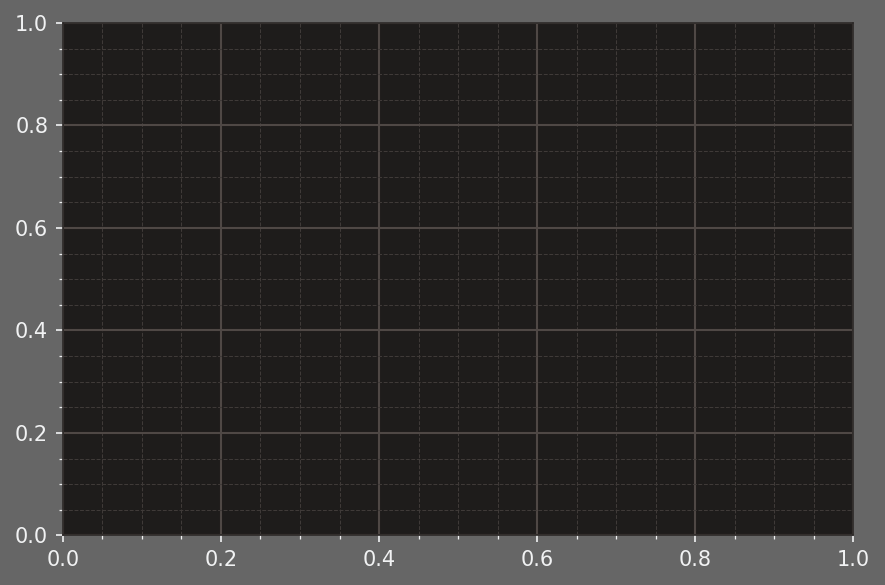

In [25]:
def update(i):
    ax.clear()
    ax.set_facecolor(plt.cm.Dark2(0.9))
    [spine.set_visible(False) for spine in ax.spines.values()]
    hbars = ax.barh(y = rank_df.iloc[i].values,
           tick_label=expand_df.iloc[i].index,
           width = expand_df.iloc[i].values,
           height = 0.8,
           color = plt.cm.Dark2(range(11))
           )
    ax.set_title(f'Frame: {i}')
    ax.bar_label(hbars, fmt='%.2d')
    

fig,ax = plt.subplots(#figsize=(10,7),
                      facecolor = plt.cm.Dark2(0.9),
                      dpi = 150,
                      tight_layout=True
                     )


data_anime = FuncAnimation(
    fig = fig,
    func = update,
    frames= len(expand_df),
    interval=1
)

In [26]:
data_anime.save("test.gif")

animation       INFO 	Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
animation       INFO 	MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 900x600 -pix_fmt rgba -r 1000.0 -loglevel error -i pipe: -filter_complex 'split [a][b];[a] palettegen [p];[b][p] paletteuse' -y test.gif


In [27]:
plt.show("test.gif")

In [28]:
new_df2

Driver,ALB,ALO,BOT,GAS,HAM,LAT,LEC,MAG,MSC,NOR,OCO,PER,RIC,RUS,STR,TSU,VER,VET,ZHO
LapNumber,,,,,,,,,,,,,,,,,,,
1,21.615,11.305,9.655,20.360,18.143,23.088,4.629,6.161,24.268,3.317,19.253,1.189,28.146,8.393,16.370,14.320,0.0,12.802,27.185
2,25.648,11.679,10.599,25.153,21.793,27.854,5.148,6.993,28.580,3.693,22.862,1.196,32.308,9.052,18.743,16.147,0.0,14.360,29.599
3,24.702,14.223,13.019,24.315,21.220,26.934,7.920,9.274,27.535,5.551,22.751,2.506,29.586,11.089,19.970,18.035,0.0,16.593,28.167
4,6.654,3.764,3.304,6.045,5.357,7.269,1.641,2.083,7.534,1.275,5.778,0.509,8.661,2.457,5.201,4.335,0.0,4.149,8.386
5,13.689,11.999,7.640,13.038,12.241,14.285,3.783,5.023,14.793,3.220,12.740,1.768,15.897,6.391,10.831,9.469,0.0,9.029,15.393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,85.281,NaN,35.651,85.852,86.215,99.724,60.345,67.118,120.985,28.916,83.769,13.565,130.606,34.963,79.124,55.491,0.0,60.155,96.897
59,87.458,NaN,37.555,88.093,88.502,101.525,59.238,68.789,120.900,30.118,85.868,13.564,132.447,36.634,82.790,56.376,0.0,63.299,98.752
60,89.495,NaN,38.524,90.144,90.716,103.009,58.489,70.355,121.376,31.296,88.045,13.611,134.348,37.847,84.708,57.211,0.0,65.309,100.368


animation       INFO 	Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
animation       INFO 	MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 900x600 -pix_fmt rgba -r 1000.0 -loglevel error -i pipe: -filter_complex 'split [a][b];[a] palettegen [p];[b][p] paletteuse' -y f1.gif


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610]


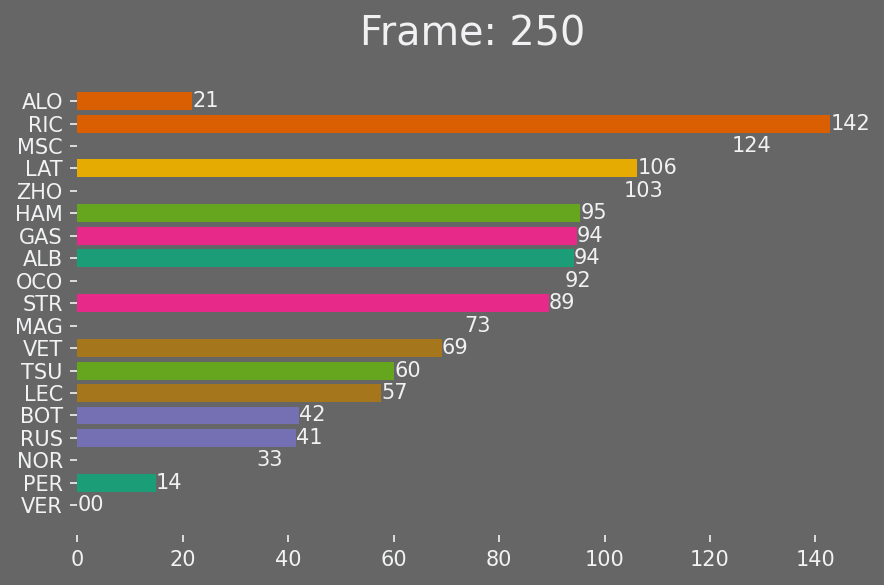

In [29]:

one_row = new_df2.iloc[0]
one_row_ascending = one_row.sort_values()
characters = new_df2.columns

new_df2.index = range(0,new_df2.shape[0]*10,10)
print(list(new_df2.index))
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

row_nums = [i for i in range(0,210) if i % 10 != 0 ]
empty = pd.DataFrame(np.nan, index= row_nums, columns = new_df2.columns)

expand_df = pd.concat([new_df2, empty]).sort_index()

rank_df = expand_df.rank(axis=1)

expand_df = expand_df.interpolate()
rank_df = rank_df.interpolate()

def update(i):
    ax.clear()
    ax.set_facecolor(plt.cm.Dark2(0.9))
    [spine.set_visible(False) for spine in ax.spines.values()]
    hbars = ax.barh(y = rank_df.iloc[i].values,
           tick_label=expand_df.iloc[i].index,
           width = expand_df.iloc[i].values,
           height = 0.8,
           color = plt.cm.Dark2(range(11))
           )
    ax.set_title(f'Frame: {i}')
    ax.bar_label(hbars, fmt='%.2d')
    

fig,ax = plt.subplots(#figsize=(10,7),
                      facecolor = plt.cm.Dark2(0.9),
                      dpi = 150,
                      tight_layout=True
                     )


data_anime = FuncAnimation(
    fig = fig,
    func = update,
    frames= len(expand_df),
    interval=1
)

data_anime.save("f1.gif")

In [30]:
new_df = pd.DataFrame()
for i in range(1, LapNumber):
    df_i = df[df["LapNumber"] == i]
    maximum = max(df_i["Time"])
    df_i["Time_Diff"] = maximum - df_i["Time"]
    #concatenate new dataframe
    new_df = pd.concat([new_df, df_i])

display (new_df.head())

new_df2 = new_df.pivot_table(values='Time_Diff', index=df.LapNumber, columns=df.Driver)
display (new_df2.head())

,Time,LapNumber,Driver,Time_Diff
0,3834.806,1,VER,28.146
63,3835.995,1,PER,26.957
126,3838.123,1,NOR,24.829
189,3843.199,1,RUS,19.753
252,3844.461,1,BOT,18.491


Driver,ALB,ALO,BOT,GAS,HAM,LAT,LEC,MAG,MSC,NOR,OCO,PER,RIC,RUS,STR,TSU,VER,VET,ZHO
LapNumber,,,,,,,,,,,,,,,,,,,
1,6.531,16.841,18.491,7.786,10.003,5.058,23.517,21.985,3.878,24.829,8.893,26.957,0.0,19.753,11.776,13.826,28.146,15.344,0.961
2,6.660,20.629,21.709,7.155,10.515,4.454,27.160,25.315,3.728,28.615,9.446,31.112,0.0,23.256,13.565,16.161,32.308,17.948,2.709
3,4.884,15.363,16.567,5.271,8.366,2.652,21.666,20.312,2.051,24.035,6.835,27.080,0.0,18.497,9.616,11.551,29.586,12.993,1.419
4,2.007,4.897,5.357,2.616,3.304,1.392,7.020,6.578,1.127,7.386,2.883,8.152,0.0,6.204,3.460,4.326,8.661,4.512,0.275
5,2.208,3.898,8.257,2.859,3.656,1.612,12.114,10.874,1.104,12.677,3.157,14.129,0.0,9.506,5.066,6.428,15.897,6.868,0.504


animation       INFO 	Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
animation       INFO 	MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 900x600 -pix_fmt rgba -r 1000.0 -loglevel error -i pipe: -filter_complex 'split [a][b];[a] palettegen [p];[b][p] paletteuse' -y f1.gif


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610]


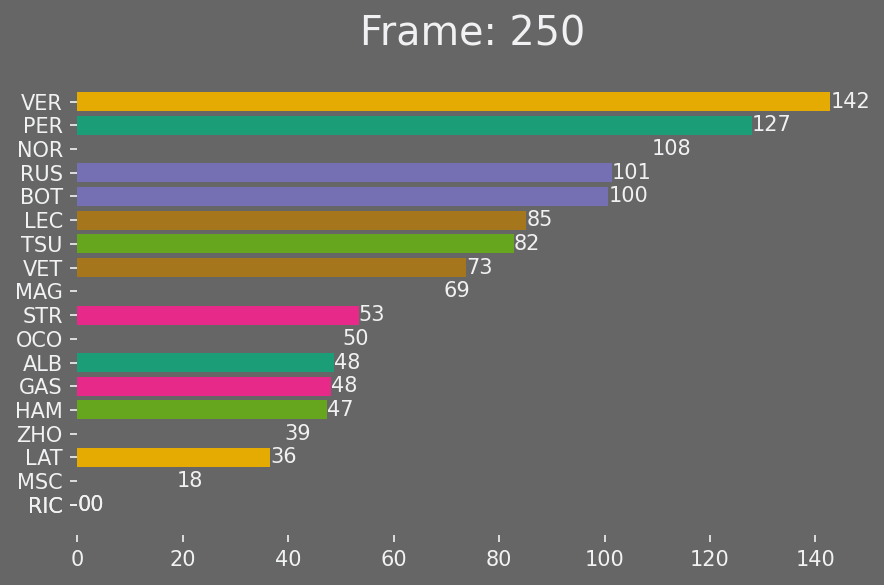

In [31]:

one_row = new_df2.iloc[0]
one_row_ascending = one_row.sort_values()
characters = new_df2.columns

new_df2.index = range(0,new_df2.shape[0]*10,10)
print(list(new_df2.index))
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

row_nums = [i for i in range(0,210) if i % 10 != 0 ]
empty = pd.DataFrame(np.nan, index= row_nums, columns = new_df2.columns)

expand_df = pd.concat([new_df2, empty]).sort_index()

rank_df = expand_df.rank(axis=1)

expand_df = expand_df.interpolate()
rank_df = rank_df.interpolate()

def update(i):
    ax.clear()
    ax.set_facecolor(plt.cm.Dark2(0.9))
    [spine.set_visible(False) for spine in ax.spines.values()]
    hbars = ax.barh(y = rank_df.iloc[i].values,
           tick_label=expand_df.iloc[i].index,
           width = expand_df.iloc[i].values,
           height = 0.8,
           color = plt.cm.Dark2(range(11))
           )
    ax.set_title(f'Frame: {i}')
    ax.bar_label(hbars, fmt='%.2d')
    

fig,ax = plt.subplots(#figsize=(10,7),
                      facecolor = plt.cm.Dark2(0.9),
                      dpi = 150,
                      tight_layout=True
                     )


data_anime = FuncAnimation(
    fig = fig,
    func = update,
    frames= len(expand_df),
    interval=1
)

data_anime.save("f1.gif")

In [32]:
new_df2.head(50)

Driver,ALB,ALO,BOT,GAS,HAM,LAT,LEC,MAG,MSC,NOR,OCO,PER,RIC,RUS,STR,TSU,VER,VET,ZHO
0,6.531,16.841,18.491,7.786,10.003,5.058,23.517,21.985,3.878,24.829,8.893,26.957,0.000,19.753,11.776,13.826,28.146,15.344,0.961
10,6.660,20.629,21.709,7.155,10.515,4.454,27.160,25.315,3.728,28.615,9.446,31.112,0.000,23.256,13.565,16.161,32.308,17.948,2.709
20,4.884,15.363,16.567,5.271,8.366,2.652,21.666,20.312,2.051,24.035,6.835,27.080,0.000,18.497,9.616,11.551,29.586,12.993,1.419
30,2.007,4.897,5.357,2.616,3.304,1.392,7.020,6.578,1.127,7.386,2.883,8.152,0.000,6.204,3.460,4.326,8.661,4.512,0.275
40,2.208,3.898,8.257,2.859,3.656,1.612,12.114,10.874,1.104,12.677,3.157,14.129,0.000,9.506,5.066,6.428,15.897,6.868,0.504
50,3.531,0.000,11.482,3.996,6.364,2.774,16.946,14.276,2.470,17.765,4.338,19.472,0.860,12.952,7.652,8.843,21.800,9.694,1.691
60,2.913,NaN,11.954,3.439,6.693,2.007,18.847,15.453,1.552,19.316,4.497,21.240,0.000,13.643,7.772,9.074,24.447,10.299,1.179
70,3.078,NaN,13.167,3.603,7.729,2.432,21.308,16.872,1.866,19.237,4.862,24.103,0.000,15.708,8.564,9.964,27.353,11.414,1.208
80,3.296,NaN,15.455,3.889,9.332,2.177,24.531,18.868,1.807,21.482,5.710,26.824,0.000,18.441,10.057,10.993,30.719,13.278,1.456
90,3.935,NaN,17.856,4.534,10.560,2.517,27.632,20.605,2.205,23.674,6.855,30.035,0.000,20.274,11.345,12.276,33.976,15.208,1.584


In [4]:
drivers_standings = pd.read_csv('https://f1-jedha-bucket.s3.eu-west-3.amazonaws.com/data/drivers_standings.csv', index_col=0)
drivers_standings.head()

,1,2,3,4,5,6,7,8
VER,0,25,25,59,85,110,125,150
PER,0,12,30,54,66,85,110,129
LEC,26,45,71,86,104,104,116,116
RUS,12,22,37,49,59,74,84,99
SAI,18,33,33,38,53,65,83,83


In [5]:
constructors_standings = pd.read_csv('https://f1-jedha-bucket.s3.eu-west-3.amazonaws.com/data/constructors_standings.csv', index_col=0)
constructors_standings.head()

,1,2,3,4,5,6,7,8
Red Bull,0,37,55,113,151,195,235,279
Ferrari,44,78,104,124,157,169,199,199
Mercedes,27,38,65,77,95,120,134,161
McLaren,0,6,24,46,46,50,59,65
Alpine F1 Team,8,16,22,22,26,34,40,47
